# Дерево решений

In [3]:
from sklearn.feature_extraction import DictVectorizer
import csv
from sklearn import tree
from sklearn import preprocessing
import matplotlib.pyplot as plt

## Загузка данных

In [4]:
#read
data = open('datasets/adult.data', 'r')
reader = csv.reader(data)
headers = next(reader)

## Получение features и labels

In [5]:
features = []
labels = []

for row in reader:
    try:
        labels.append(row[len(row)-1])
        rowDict = {}
        for i in range(1,len(row)-1):
            rowDict[headers[i]] = row[i]
        features.append(rowDict)
    except IndexError:
        print("Sorry... len(row) = ", len(row))

Sorry... len(row) =  0


C:\Users\lerus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


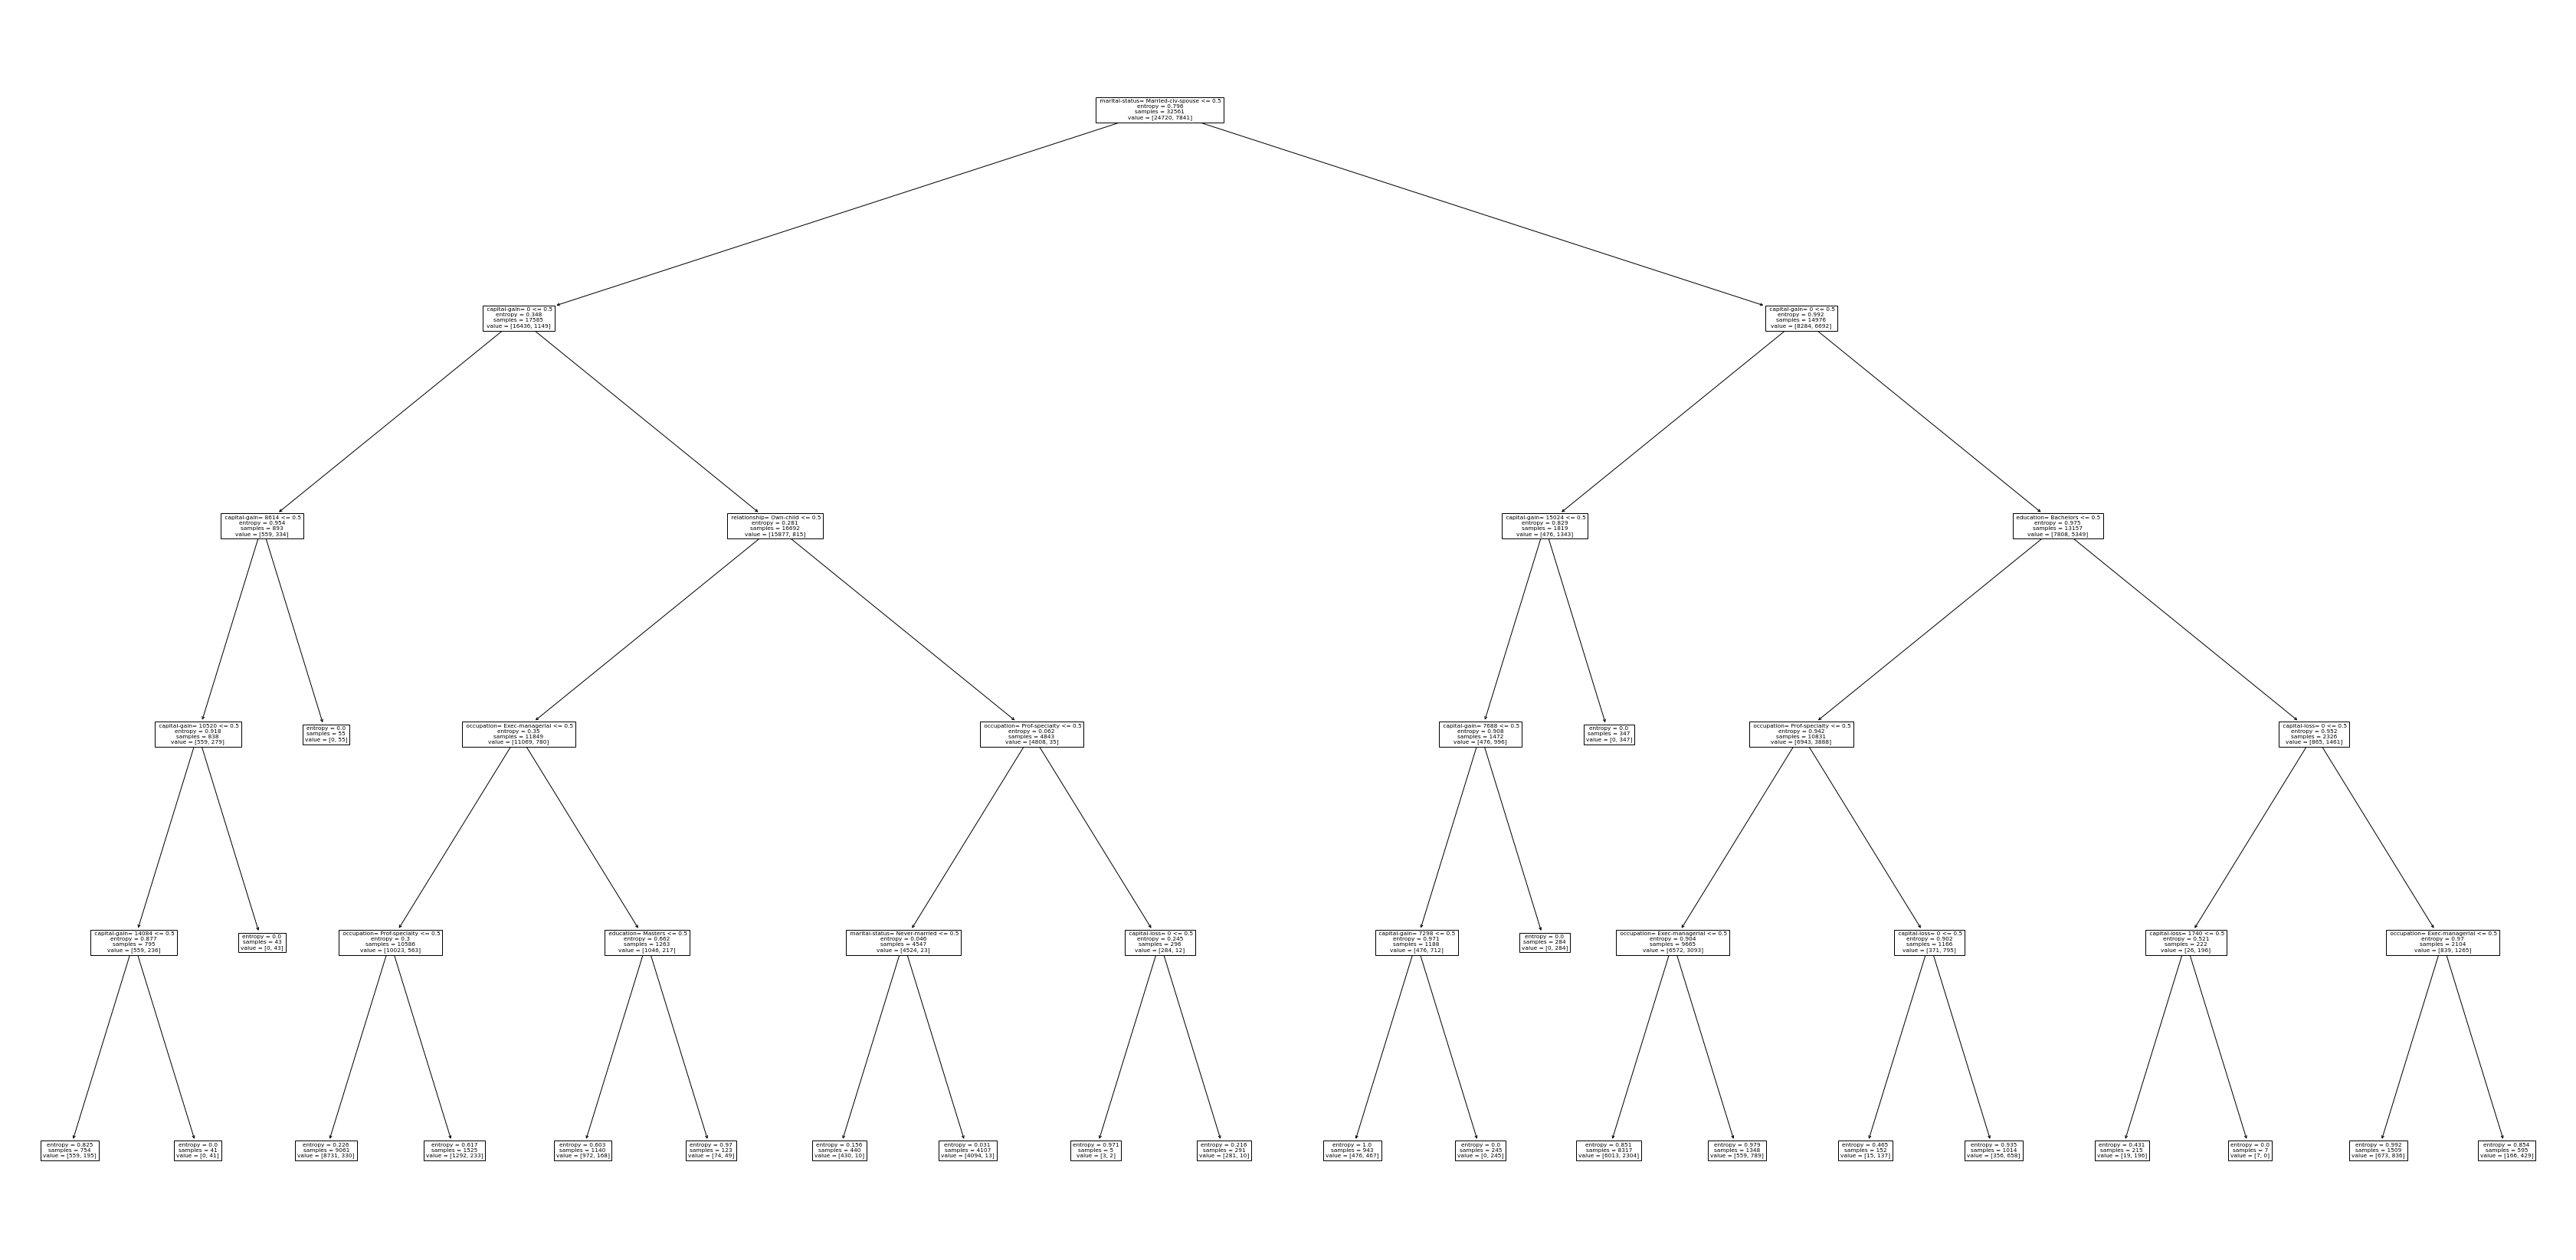

In [2]:
vec = DictVectorizer()
dummyX = vec.fit_transform(features).toarray()

lb = preprocessing.LabelBinarizer()
dummyY = lb.fit_transform(labels)


# Вызовите дерево решений, чтобы построить функцию для обучения дерева решений
clf = tree.DecisionTreeClassifier(max_depth=5, criterion='entropy')
clf = clf.fit(dummyX, dummyY)

plt.facecolor = 1 # disable transparent background
plt.figure(figsize=(60,30))
# Распечатать дерево решений, установить графический инструмент для печати экспортированного дерева решений
with open('decisionTreeResult.dot','w') as f:
    f = tree.export_graphviz(clf,feature_names=vec.get_feature_names(),out_file=f)
    tree.plot_tree(clf,feature_names=vec.get_feature_names())